In [1]:
import numpy as np

def my_fun(x):
    return np.cos(x)

def simpson_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3) * (y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-1:2]) + y[-1])

a = -np.pi/2
b = np.pi/2
n = 2

true_value = np.sin(b) - np.sin(a)
simpson_result = simpson_rule(my_fun, a, b, n)

print(f"참값: {true_value}")
print(f"심슨 1/3 법칙: {simpson_result}, 오차: {abs(true_value - simpson_result)}")


참값: 2.0
심슨 1/3 법칙: 2.0943951023931953, 오차: 0.09439510239319526


In [2]:
import numpy as np

def my_fun(x):
    return x**2

# 가우스-라게르 구적법
def gauss_laguerre_rule(f, n):
    x, w = np.polynomial.laguerre.laggauss(n)
    return np.sum(w * f(x))

result = gauss_laguerre_rule(my_fun, 2)

print(f"가우스-라게르 적분 결과: {result}")

가우스-라게르 적분 결과: 2.0


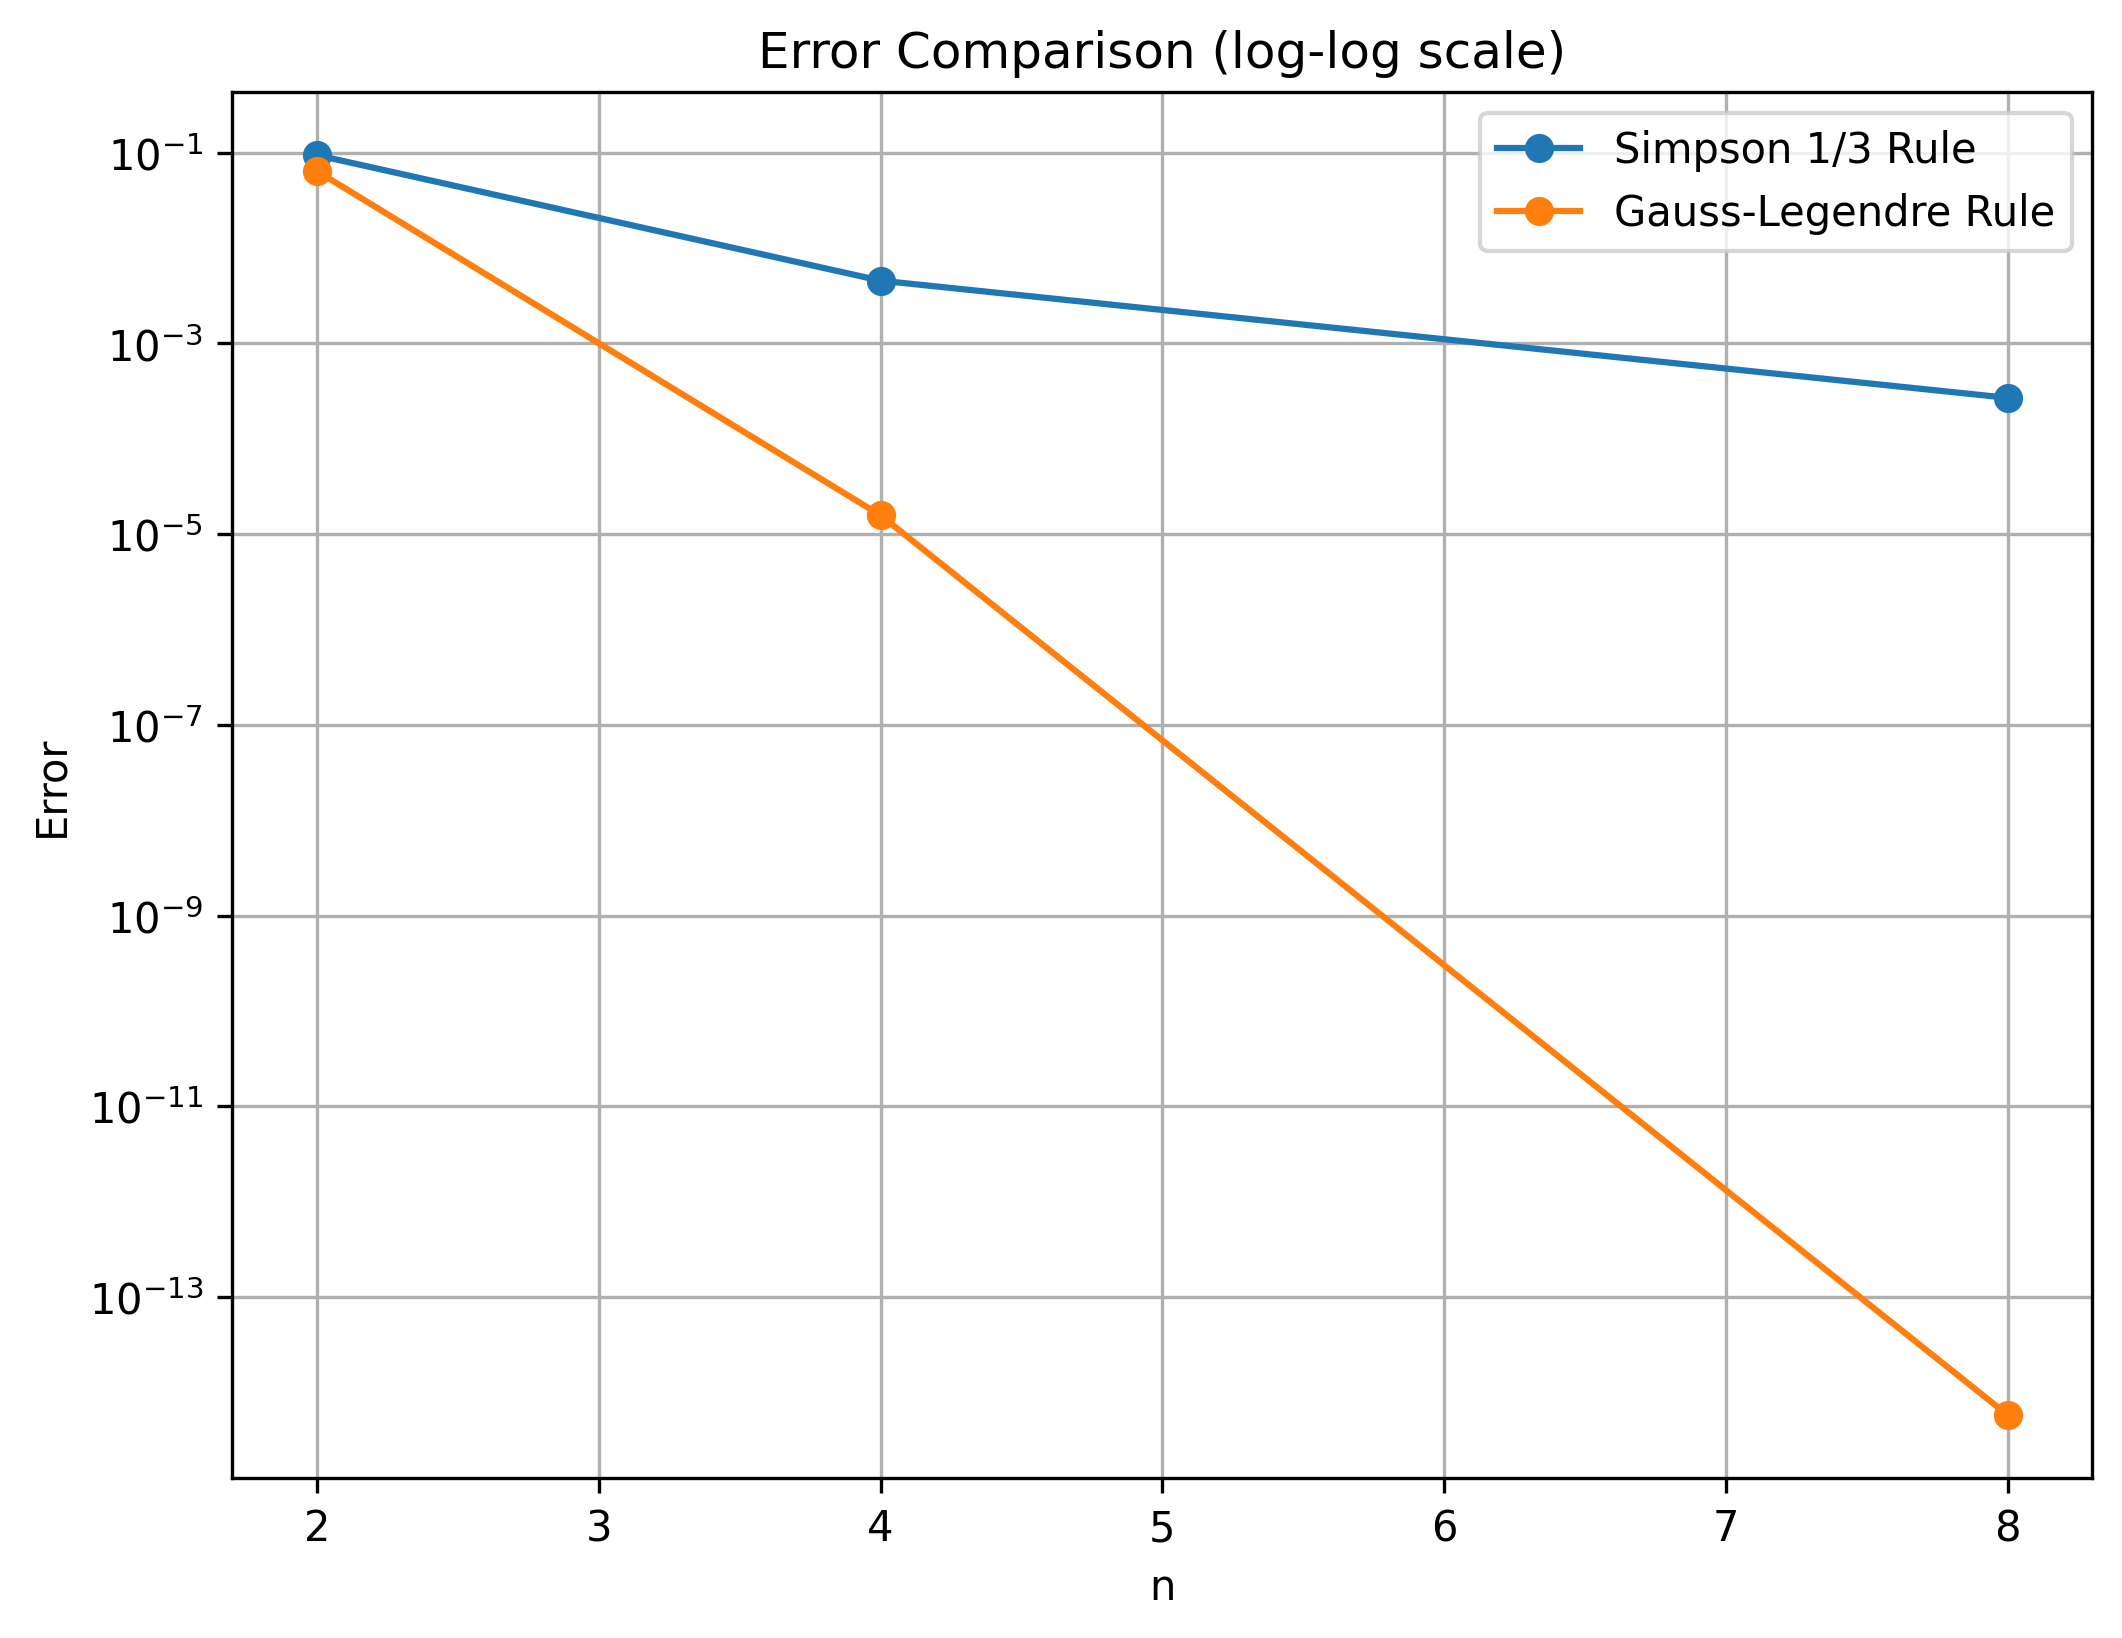

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def my_fun(x):
    return np.cos(x)

def simpson_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3) * (y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-1:2]) + y[-1])

def gauss_legendre_rule(f, a, b, n):
    x, w = np.polynomial.legendre.leggauss(n)
    t = (b - a) * x / 2 + (b + a) / 2
    return 0.5 * (b - a) * np.sum(w * f(t))

a = -np.pi/2
b = np.pi/2
n_values = [2, 4, 8]

true_value = np.sin(b) - np.sin(a)
simpson_errors = []
gauss_legendre_errors = []

for n in n_values:
    simpson_result = simpson_rule(my_fun, a, b, n)
    gauss_legendre_result = gauss_legendre_rule(my_fun, a, b, n)
    
    simpson_error = abs(true_value - simpson_result)
    gauss_legendre_error = abs(true_value - gauss_legendre_result)
    
    simpson_errors.append(simpson_error)
    gauss_legendre_errors.append(gauss_legendre_error)

plt.figure(figsize=(8, 6), dpi=300)
plt.semilogy(n_values, simpson_errors, 'o-', label='Simpson 1/3 Rule')
plt.semilogy(n_values, gauss_legendre_errors, 'o-', label='Gauss-Legendre Rule')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error Comparison (log-log scale)')
plt.legend()
plt.grid(True)
plt.show()